In [11]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install awscli 
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload
import torch, torchvision
torch.__version__
!gcc --version

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: torch==1.4+cu100 in /usr/local/lib/python3.6/dist-packages (1.4.0+cu100)
Requirement already up-to-date: torchvision==0.5+cu100 in /usr/local/lib/python3.6/dist-packages (0.5.0+cu100)
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-1fwuwqmo
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-1fwuwqmo
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=265567 sha256=d6fb5dc9ecb12ef55e10f0079ae53fc62c31183df120006e0ce3737ab2431e99
  Stored in directory: /tmp/pip-ephem-wheel-cache-beylc20n/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
ERROR: detectron2 0.2.1+cu100 has requirement pycocotools>=2.0.1, but you'll have pycocotools 2.0 which is incompatible.
  Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0

     |████████████████████████████████| 5.7MB 15.9MB/s 
     |████████████████████████████████| 112kB 61.0MB/s 
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35416 sha256=32091ec7869b76a6ff69a88152fcbb3dac4dbe221aa22555afd552abe9658888
  Stored in directory: /root/.cache/pip/wheels/4b/f4/11/bc4166107c27f07fd7bba707ffcb439619197638a1ac986df3
Successfully built olefile
ERROR: scikit-image 0.16.2 has requirement pillow>=4.3.0, but you'll have pillow 4.1.1 which is incompatible.
ERROR: detectron2 0.2.1+cu100 has requirement Pillow>=7.1, but you'll have pillow 4.1.1 which is incompatible.
ERROR: detectron2 0.2.1+cu100 has requirement pycocotools>=2.0.1, but you'll have pycocotools 2.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 8.1.0
    Uninstalling Pillow-8.1.0:
      Successfully uninstalled Pillow-8.1.0


gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [8]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html


In [2]:

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger() # this logs Detectron2 information such as what the model is doing when it's training

# import some common libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo # a series of pre-trained Detectron2 models: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md
from detectron2.engine import DefaultPredictor # a default predictor class to make predictions on an image using a trained model
from detectron2.config import get_cfg # a config of "cfg" in Detectron2 is a series of instructions for building a model
from detectron2.utils.visualizer import Visualizer # a class to help visualize Detectron2 predictions on an image
from detectron2.data import MetadataCatalog # stores information about the model such as what the training/test data is, what the class names are

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



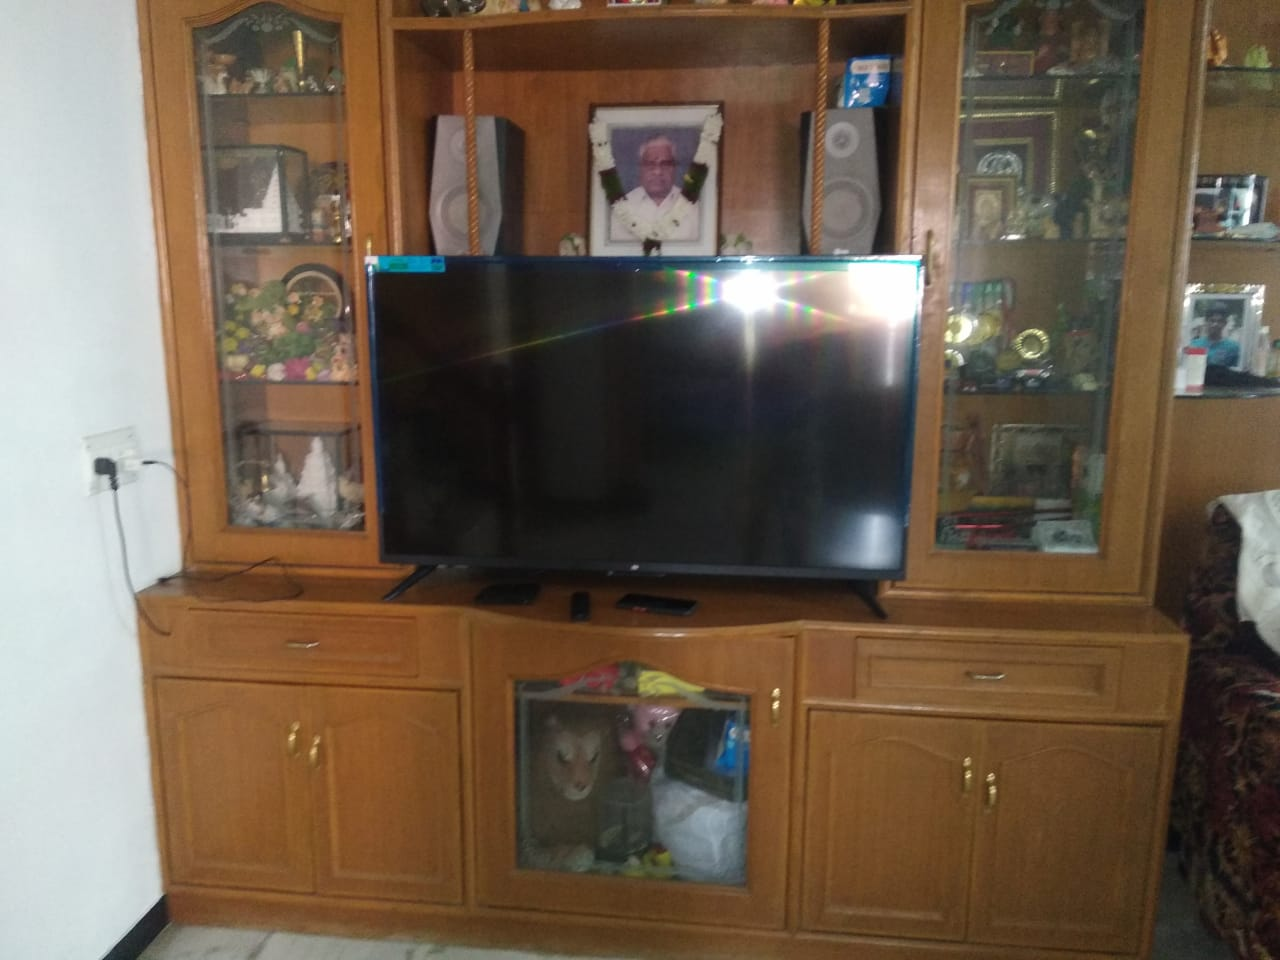

In [3]:
img = cv2.imread("./demo.jpeg")
cv2_imshow(img)

In [4]:
# Download the trained model
!wget https://storage.googleapis.com/airbnb-amenity-detection-storage/airbnb-amenity-detection/open-images-data/retinanet_model_final/retinanet_model_final.pth 

# Download the train model config (instructions on how the model was built)
!wget https://storage.googleapis.com/airbnb-amenity-detection-storage/airbnb-amenity-detection/open-images-data/retinanet_model_final/retinanet_model_final_config.yaml

--2021-02-08 07:58:46--  https://storage.googleapis.com/airbnb-amenity-detection-storage/airbnb-amenity-detection/open-images-data/retinanet_model_final/retinanet_model_final.pth
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446656531 (426M) [application/octet-stream]
Saving to: ‘retinanet_model_final.pth’

retinanet_model_fin 100%[===================>] 425.96M   110MB/s    in 3.9s    

2021-02-08 07:58:50 (110 MB/s) - ‘retinanet_model_final.pth’ saved [446656531/446656531]

--2021-02-08 07:58:50--  https://storage.googleapis.com/airbnb-amenity-detection-storage/airbnb-amenity-detection/open-images-data/retinanet_model_final/retinanet_model_final_config.yaml
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.176, 172.217.7.208, 172.217.15.80, ...
Connec

In [5]:
# Target classes with spaces removed
target_classes = ['Bathtub',
 'Bed',
 'Billiard table',
 'Ceiling fan',
 'Coffeemaker',
 'Couch',
 'Countertop',
 'Dishwasher',
 'Fireplace',
 'Fountain',
 'Gas stove',
 'Jacuzzi',
 'Kitchen & dining room table',
 'Microwave oven',
 'Mirror',
 'Oven',
 'Pillow',
 'Porch',
 'Refrigerator',
 'Shower',
 'Sink',
 'Sofa bed',
 'Stairs',
 'Swimming pool',
 'Television',
 'Toilet',
 'Towel',
 'Tree house',
 'Washing machine',
 'Wine rack']

In [6]:
cfg = get_cfg() # setup a default config, see: https://detectron2.readthedocs.io/modules/config.html
cfg.merge_from_file("./retinanet_model_final_config.yaml") # merge the config YAML file (a set of instructions on how to build a model)
cfg.MODEL.WEIGHTS = "./retinanet_model_final.pth" # setup the model weights from the fully trained model

# Create a default Detectron2 predictor for making inference
predictor = DefaultPredictor(cfg)

# Make a prediction the example image from above
outputs = predictor(img)

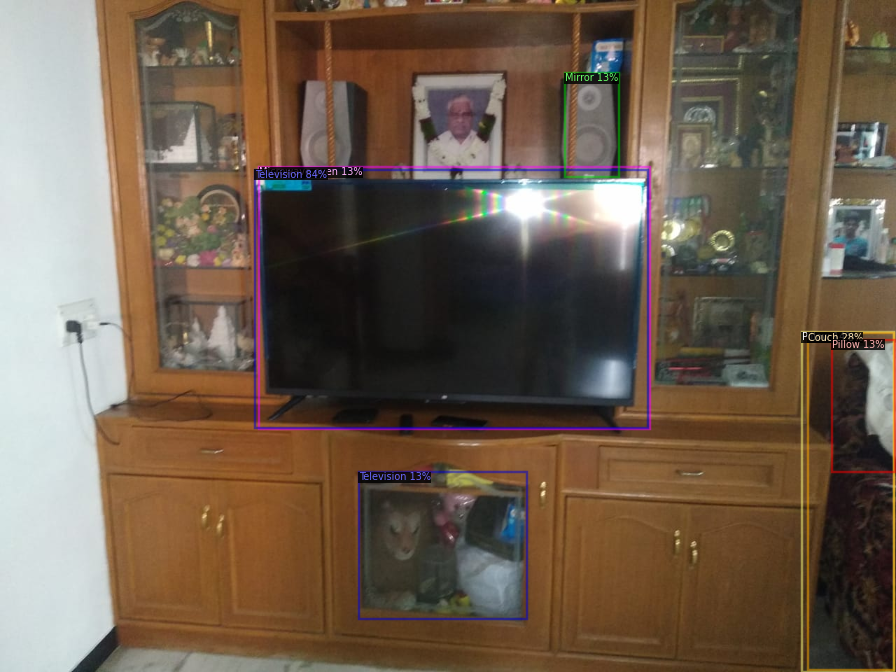

In [7]:
# Number of predicted amenities to draw on the target image
num_amenities = 7

# Set up a visulaizer instance: https://detectron2.readthedocs.io/modules/utils.html#detectron2.utils.visualizer.Visualizer
visualizer = Visualizer(img_rgb=img[:, :, ::-1], # we have to reverse the color order otherwise we'll get blue images (BGR -> RGB)
                        metadata=MetadataCatalog.get(cfg.DATASETS.TEST[0]).set(thing_classes=target_classes), # we tell the visualizer what classes we're drawing (from the target classes)
                        scale=0.7)

# Draw the models predictions on the target image
visualizer = visualizer.draw_instance_predictions(outputs["instances"][:num_amenities].to("cpu"))

# Display the image
cv2_imshow(visualizer.get_image()[:, :, ::-1])